In [258]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [259]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [260]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [261]:

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [262]:

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [263]:
import numpy as np
def load_data(img_path):
    imgs, labels = [], []
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        imgs.append(np.array(Image.open(file), dtype=np.float32) )
        labels.append(0)
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        imgs.append(np.array(Image.open(file), dtype=np.float32) )
        labels.append(1)
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        imgs.append(np.array(Image.open(file), dtype=np.float32) )
        labels.append(2)
    return np.array(imgs), np.array(labels)

# def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
#     # 가위 : 0, 바위 : 1, 보 : 2
#     img_size=28
#     color=3
#     #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
#     imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/scissor/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=0   # 가위 : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/rock/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=1   # 바위 : 1
#         idx=idx+1  
    
#     for file in glob.iglob(img_path+'/paper/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=2   # 보 : 2
#         idx=idx+1
        
#     print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
#     return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (300, 64, 64, 3)
y_train shape: (300,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


라벨:  0


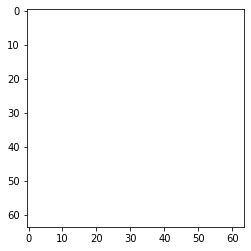

In [264]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [265]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import regularizers

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, 
                              (3,3), 
                              activation='relu', 
                              input_shape=(64,64,3),
                              kernel_regularizer=regularizers.l2(0.001)
                             )
         )
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, 
                              (3,3), 
                              activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)
                             )
         )
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                200736    
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)              

In [266]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# Optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
history = model.fit(
    x_train_norm, y_train,
    epochs=50,                     
    validation_split=0.2,          
    callbacks=[es]
)


Epoch 1/50
8/8 [==============================] - 1s 135ms/step - loss: 1.1012 - accuracy: 0.4250 - val_loss: 1.3635 - val_accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 1s 122ms/step - loss: 1.0831 - accuracy: 0.4208 - val_loss: 1.4760 - val_accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 1s 127ms/step - loss: 1.0797 - accuracy: 0.4125 - val_loss: 1.5003 - val_accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 1s 116ms/step - loss: 1.0779 - accuracy: 0.4375 - val_loss: 1.5170 - val_accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 1s 117ms/step - loss: 1.0667 - accuracy: 0.3750 - val_loss: 1.5398 - val_accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 1s 115ms/step - loss: 1.0713 - accuracy: 0.4375 - val_loss: 1.5895 - val_accuracy: 0.0000e+00


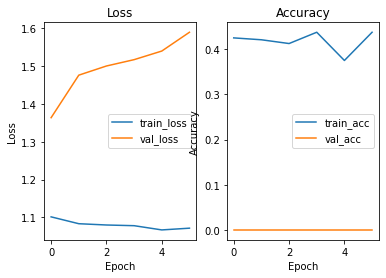

In [267]:
import matplotlib.pyplot as plt
# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [268]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)


In [269]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1470 - accuracy: 0.3333
test_loss: 1.147039532661438 
test_accuracy: 0.3333333432674408
